In [6]:
import numpy as np

from sklearn.decomposition import PCA

#테스트할 데이터 [6,18]
X=np.array([[1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,4,5,6],

             [1,2,1,1,1,1,1,1,1,1,3,4,3,3,3,4,5,6],

             [3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,5,4,6],

             [3,4,3,3,3,1,2,1,1,1,1,1,1,1,1,5,4,5],

             [1,1,1,1,1,3,3,3,3,3,1,1,1,1,1,6,4,5],

             [1,2,1,1,1,3,3,3,2,3,1,1,1,1,1,5,4,5]])

print(X.shape)

#주성분 분석(3개의 주성분으로 축소)
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
X_pca[:5]

(6, 18)
(6, 3)


array([[ 3.84432202,  0.20850925,  0.46823094],
       [ 4.09935419, -0.13332384, -0.49268129],
       [-1.70050345, -3.04924012,  0.76869479],
       [-2.21379239, -3.06986255, -0.66041977],
       [-2.102115  ,  3.36337224,  0.55345806]])

In [7]:
#주성분1은 54%, 주성분2는 42%, 주성분3은 2%, 나머지가 2% (주성분 1,2만으로 96%를 설명함)
#각 주성분의 축에 해당하는 데이터셋의 분산 비율

for i in pca.explained_variance_ratio_:

    print('{:.2f}'.format(i))

0.54
0.42
0.02


In [9]:
#3개의 주성분으로 축소된 자료를 원래의 형태로 복원(정보의 손실이 있음)

X_inv = pca.inverse_transform(X_pca)

print(X[0])
print(X_inv[0])

#복원 단계에서 정보 손실이 발생할 수 있음

[1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 5 6]
[1.01080967 1.1237144  1.01080967 1.01080967 1.01080967 1.04652366
 0.87642192 1.04652366 1.15635772 1.04652366 2.94266667 3.3355072
 2.94266667 2.94266667 2.94266667 4.16176255 4.97133333 6.14683992]


In [10]:
#재구성 오차(reconstruction error) 계산 : 원본 데이터와 압축 후 원복한 데이터 사이의 평균 제곱 거리

1 - pca.explained_variance_ratio_.sum()

0.01518968553184119

In [13]:
# MNIST 압축

# pip install tensorflow

# pip install keras

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 28x28 => 784로 변환

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0

X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

print(y_train[:5])

[5 0 4 1 9]


In [14]:
#적절한 차원의 수 선택

# 분산을 95%로 유지하는 차원의 수 계산

from sklearn.decomposition import PCA

import numpy as np

pca = PCA()

pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1

d

#154

154

In [15]:
# 분산비율을 직접 지정하는 방식

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train)

print(pca.n_components_) #차원(주성분의 수)

print(np.sum(pca.explained_variance_ratio_)) #분산비율 합계

154
0.9501961


<class 'numpy.ndarray'>
X_reduced:  (60000, 154)
X_recovered:  (60000, 784)


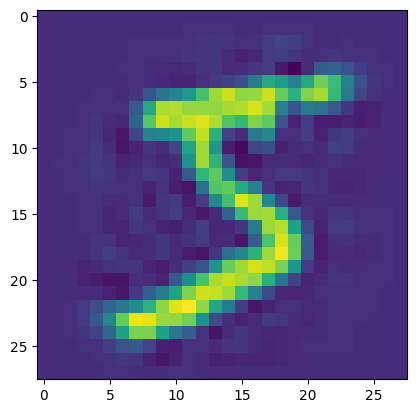

In [25]:
import matplotlib.pyplot as plt

# 154 차원으로 압축

pca = PCA(n_components = 154)

X_reduced = pca.fit_transform(X_train)
print(type(X_reduced))
print("X_reduced: ", X_reduced.shape)

# 784차원으로 복원

X_recovered = pca.inverse_transform(X_reduced)
print("X_recovered: ", X_recovered.shape)

plt.imshow(X_recovered.reshape(60000,28,28)[0])

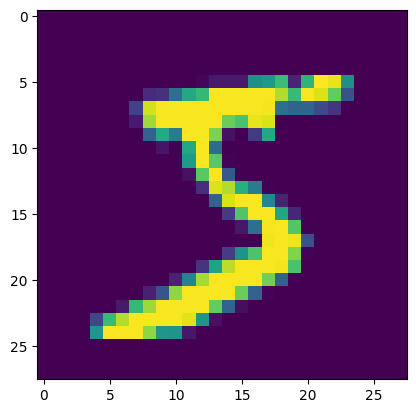

In [26]:
plt.imshow(X_train[0].reshape(28,28))

In [27]:
# 대량의 데이터의 경우 pca를 구현하기 위해 전체 데이터셋을 메모리에 올리는 것이 어려울 수 있음

# 점진적 pca(Incremental PCA) 알고리즘을 사용하여 미치배치 방법으로 pca를 실행할 수 있음

from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

#미니배치에 해당하는 부분만 사용하므로 메모리가 절약됨

for X_batch in np.array_split(X_train, n_batches):

    print(".", end="")

    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

....................................................................................................

In [28]:
#일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 비교

# 평균이 같은지 확인

# allclose() 두 배열이 오차범위 내에서 같으면 True, 다르면 False

np.allclose(pca.mean_, inc_pca.mean_)


# True

False

In [29]:
np.mean(pca.mean_), np.mean(inc_pca.mean_)

(0.13066266, 0.1306604774024101)

In [30]:
#랜덤 포레스트 모형
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=0)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [31]:
#정확도 출력

from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred)

# 94.92%

0.9469

In [32]:
# PCA를 사용하여 분산이 95%가 되도록 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)

In [33]:
#랜덤 포레스트 모형에 압축된 데이터 입력

rnd_clf2 = RandomForestClassifier(n_estimators=10, random_state=0)

rnd_clf2.fit(X_train_reduced, y_train)

#학습 시간: 9.93초(느려짐)

#차원 축소가 반드시 학습 시간 단축을 의미하지는 않음

RandomForestClassifier(n_estimators=10, random_state=0)

In [34]:
#검증용 데이터셋으로 평가

X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)

accuracy_score(y_test, y_pred)

# 90.09%

#차원 축소로 인한 정보 손실로 성능이 감소되는 것이 일반적

0.8942

In [35]:
#multinomial: 소프트맥스 방식의 로지스틱 회귀분석

#시간이 많이 걸림

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=0)

log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [ ]:
y_pred = log_clf.predict(X_test)

accuracy_score(y_test, y_pred)

#92.22%

In [ ]:
#주성분분석으로 축소된 데이터셋으로 학습

log_clf2 = LogisticRegression(multi_class="multinomial", max_iter=1000, random_state=0)

log_clf2.fit(X_train_reduced, y_train)

#8.62초, 차원 축소 후 시간이 감소함

In [ ]:
y_pred = log_clf2.predict(X_test_reduced)

accuracy_score(y_test, y_pred)

#92.03% , 성능이 약간 감소되었으나 속도가 향상되었음